In [ ]:
import pandas as pd

url = "https://media.geeksforgeeks.org/wp-content/uploads/20240319120216/housing.csv"
df = pd.read_csv(url)
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


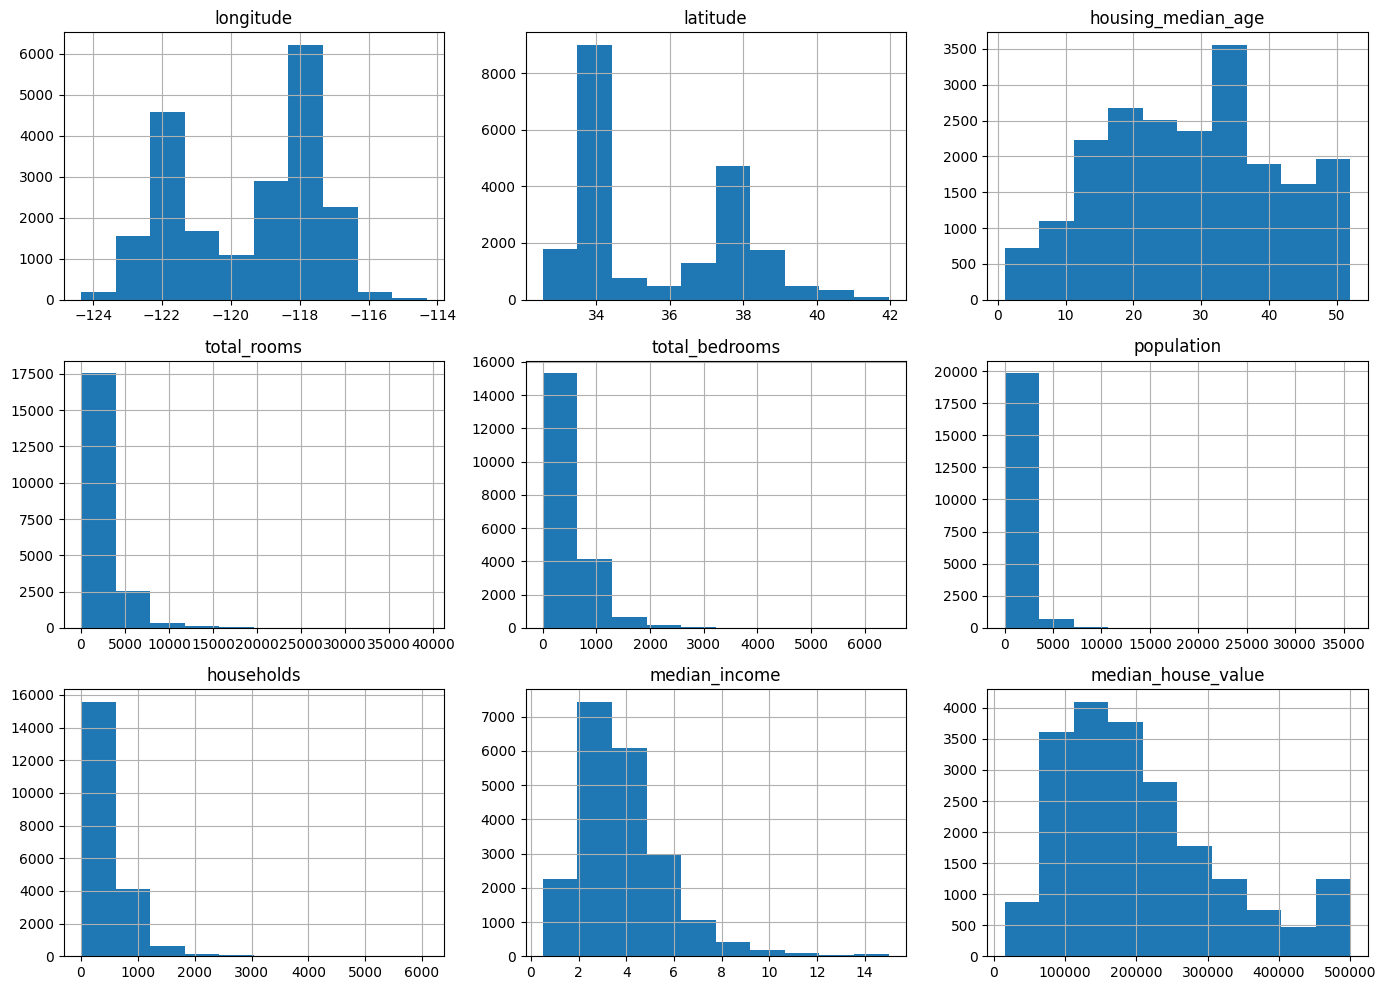

In [ ]:
import matplotlib.pyplot as plt

df.hist(figsize=(14, 10))
plt.tight_layout()
plt.show()


median_income: The histogram of median_income will likely show how income levels are distributed across the dataset. A sharp peak around certain income levels indicates common income ranges, and the spread indicates how varied the income distribution is.
house_median_age: The histogram of house_median_age will show how the ages of houses in the dataset are distributed. A peak around specific age groups might indicate a concentration of housing stock built in certain decades.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("median_house_value", axis=1)  # Features
y = df["median_house_value"]  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Difference:

Random Sampling: Splits the dataset randomly. This may result in an unrepresentative test set if the target variable distribution is skewed.
Stratified Sampling: Ensures that the proportion of classes or values in the target variable is similar in both the training and testing datasets, improving the representativeness of the test set.

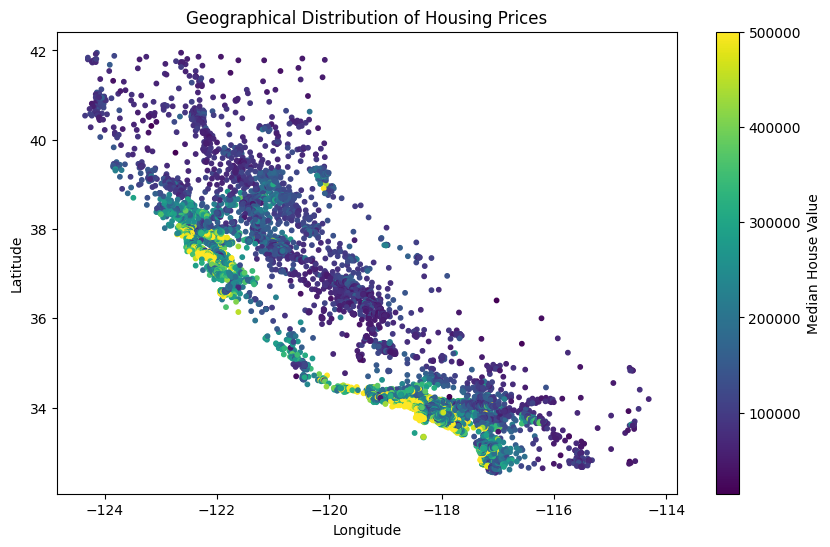

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], c=df['median_house_value'], cmap='viridis', s=10)
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Housing Prices')
plt.show()


This scatter plot shows the geographical distribution of houses and their prices. The color intensity indicates the housing prices, and you can visually spot areas with high or low prices based on location.

Features to Combine for Improved Correlation

**total_rooms and total_bedrooms:**
These two features are related because the number of bedrooms is often a subset of the number of rooms in a house.
***total_rooms and households:***
By dividing total_rooms by households, you can create a feature representing the "room density" in relation to the number of households.
***households and population:***
Combining these features may help provide a better understanding of the number of people per household, which could correlate with housing prices.
**longitude and latitude:**
These geographical features can be combined to form a "location" or "region" feature that might have a stronger correlation with house prices.

In [ ]:
import seaborn as sns

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


ValueError: could not convert string to float: 'NEAR BAY'

The correlation matrix helps identify which features are most strongly correlated with the target variable (median_house_value). Features with high correlation indicate that they have a strong linear relationship with the target.

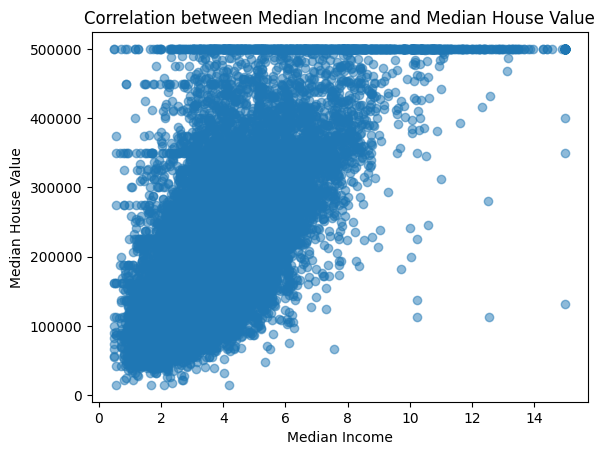

In [ ]:
plt.scatter(df['median_income'], df['median_house_value'], alpha=0.5)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Correlation between Median Income and Median House Value')
plt.show()


In [ ]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']

# Plot correlation matrix again
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


ValueError: could not convert string to float: 'NEAR BAY'

In [ ]:
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop("median_house_value", axis=1))

df_scaled = pd.DataFrame(scaled_features, columns=df.drop("median_house_value", axis=1).columns)


Feature scaling is crucial in machine learning because it ensures that all features contribute equally to the model, preventing features with larger numeric ranges from dominating. It is particularly important for algorithms like gradient descent, K-Nearest Neighbors (KNN), and Support Vector Machines (SVM), which rely on distance calculations or gradient updates. Scaling also improves model convergence, performance, and interpretability, especially in regularized models where unscaled features with large ranges could disproportionately affect the penalty term. Common scaling methods include Standardization (Z-score) and Min-Max Scaling, each with specific use cases depending on the algorithm being used.

In [ ]:

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Identify numerical and categorical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Define transformations for numerical and categorical data
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('scaler', StandardScaler())  # Standardize the data
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent category
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # Encode categorical variables
])

# Combine the transformers in a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

# Define a pipeline with preprocessing and a model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())  # Example regressor model
])

# Train and predict
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)


NameError: name 'LinearRegression' is not defined

A machine learning pipeline with custom transformations, encoding, and feature scaling sequentially prepares data by applying custom changes to features, converting categorical data into numerical values, and scaling numerical features to ensure equal contribution. This process ensures consistent, efficient, and effective data preparation for model training.
